# Predict the adoptability of shelter pet photos
*Inspired by PetFinder.my - Pawpularity Contest*

## Introduction
Before I settled in California, I was always thinking to adopt a cat. So after I finally settle, I check petfinder, if you're not familiar with it, it's a platform that helps you to find pets that are available for adoption. I live in westwood and there are plenty of shelters but I end up adopt from a shelter 60 miles away after I saw the picture of our cat in Petfinder. Without any reponse from the shelter, just one single picture in petfinder, we drove there immediately after we saw his cute cat paws. Before that we had been to many shelters and met so many stray animals, all after we saw some cute animal friends we would want to meet. Petfinder.com has options for shelters and rescuers to set up the pet profile, their basic features, but from my experience, the first sight from the pictures matters the most. I think this project can help improve people find their ideal animal friends, as well as more animal waiting to be adopted find their forever home. It can also guide shelters and rescuers to take better pictures to increase the chance that these animals being favored at the first sight. I also adopted a puppy in my home country China, where animal rescuing growing rapidly these few years. But we are not doing enough. I was also volunteering and helping local shelters, and writing a lot to government facilities for animal protection laws. I really hope this project can provide some insights, at least for myself, to improve animal rescue and promote stray animal adoption.

## Methods
### About the Project data

Here's the link of data sources. Final Project Datasets: Petfinder Popularity of shelter pet photos prediction

#### - The Pawpularity Score

The Pawpularity Score is derived from each pet profile's page view statistics at the listing pages, using an algorithm that normalizes the traffic data across different pages, platforms (web & mobile) and various metrics. Duplicate clicks, crawler bot accesses and sponsored profiles are excluded from the analysis.

#### - Test and Train

The data is consisted of test data and train data. To be noted, the train.csv and test.csv files contain metadata for photos in the training set and test set, respectively. They featured each photo features such as photo quality, pet action, etc.

#### - Usage of the data

The original data set is consisted of both tabular and picture data. I intended to analyze both, however, my macbook doesn't support tensorflow. I tried to set virtual environment but it worked really slow. And I was always confused. Now my laptop is having all kind of remaining problems with installing packages. So before I completely solve the problem, I have to leave the image processing and only work with numbers so far. It's sad that I finish this project solely on binder at last because I cannot even install packages like seaborn or numpy in my laptop.

#### - Purpose of Photo Metadata

The Photo Metadata in this project is optional, manually labeling each photo for key visual quality and composition parameters by the PetFinder team. These labels are not used for deriving the Pawpularity score, but it may be beneficial for better understanding the content and co-relating them to a photo's attractiveness. The end goal is to deploy AI solutions that can generate intelligent recommendations (i.e. show a closer frontal pet face, add accessories, increase subject focus, etc) and automatic enhancements (i.e. brightness, contrast) on the photos, so we are hoping to have predictions that are more easily interpretable.

## Exploratory Data Analysis (EDA)

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from glob import glob

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [7]:
train_jpg = glob("train/*.jpg")
test_jpg = glob("test/*.jpg")

### Tabular data

In [8]:
train_df.shape

(9912, 14)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


In [10]:
test_df.shape

(8, 13)

In [11]:
type(train_jpg)

list

In [12]:
len(train_jpg)

9912

In [13]:
train_jpg[0:5]

['train/2ba808b11e2e7302c65c1142fae20328.jpg',
 'train/492babff6c77d1f1be8e266cc7c89ab4.jpg',
 'train/80fefdaf088a47eeea3d67d30ecf5f2c.jpg',
 'train/df68a50f7971ab56ca45e6d4378a9e8f.jpg',
 'train/420dd08c4151dc5eb4465633416d56bd.jpg']

### The train data

In [14]:
train_df.head()
# the 0/1 shows no/yes of each feature

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [15]:
train_df.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
count,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000
mean,0.027643,0.772599,0.903955,0.861582,0.009988,0.067797,0.129338,0.049637,0.166263,0.172014,0.061239,0.070420,38.039044
std,0.163957,0.419175,0.294668,0.345356,0.099444,0.251409,0.335591,0.217204,0.372335,0.377411,0.239780,0.255866,20.591990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [16]:
train_df[['Pawpularity']].describe()

,Pawpularity
count,9912.000000
mean,38.039044
std,20.591990
min,1.000000
25%,25.000000
50%,33.000000
75%,46.000000
max,100.000000


Looks like most of the pictures do not have high score, even the 75% has score lower than 50

#### Distribution of the trainin set

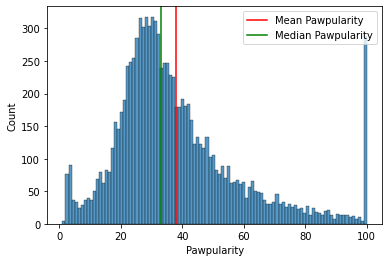

In [17]:
sns.histplot(data=train_df, x='Pawpularity', bins=100)
plt.axvline(train_df['Pawpularity'].mean(), c='red', ls='-',label='Mean Pawpularity')
plt.axvline(train_df['Pawpularity'].median(),c='green',ls='-',label='Median Pawpularity')
plt.legend()
plt.show()

From the distribution graph we can see that there are several cluster in the data. But there are also aroung 300 100 score. However, following the trend in the distribution there should be little 100 score. But there are almost 10 thousand data and there is a cluster below 10, so I think it's still fine to keep the number.

#### Distribution of each feature

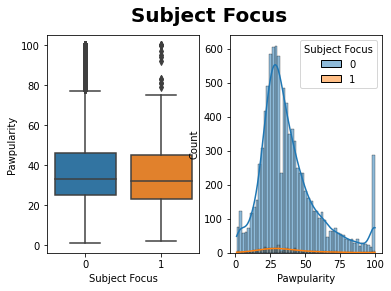

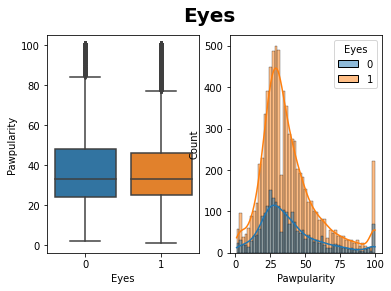

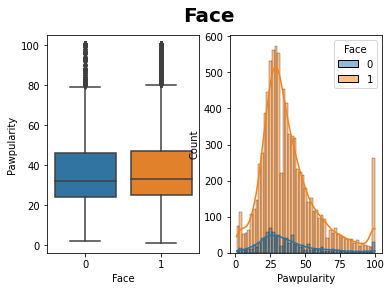

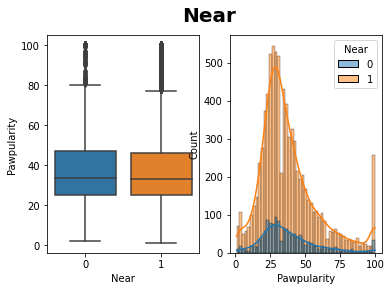

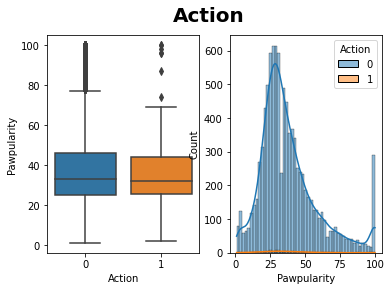

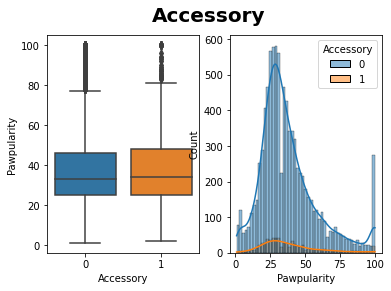

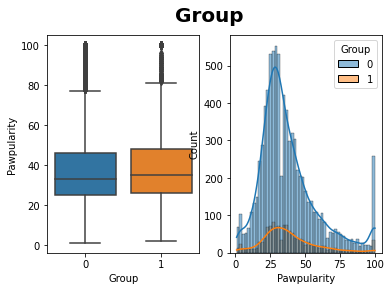

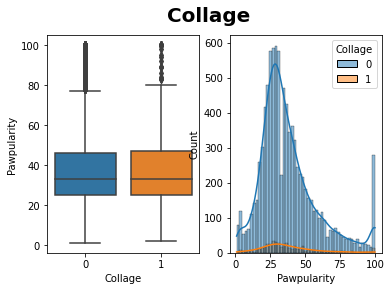

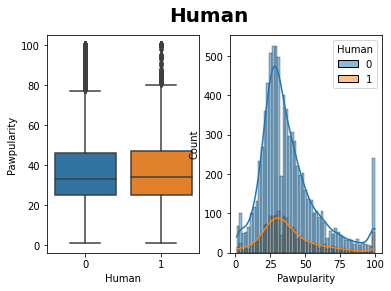

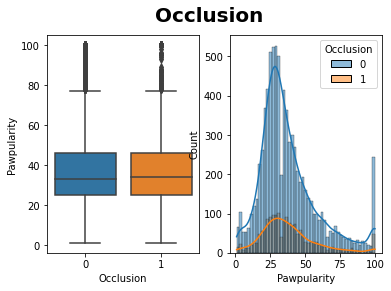

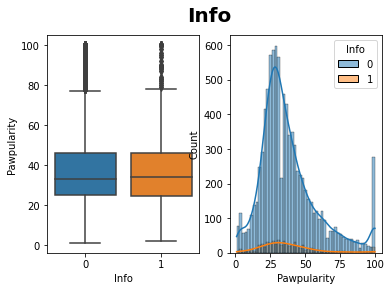

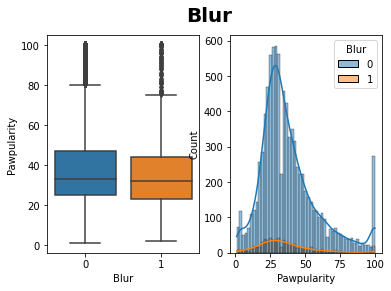

In [18]:
feature_variables = train_df.columns.values.tolist()

#for each of the feature variables, doesn't include Id and Pawpularity by using [1:-1]
#show a boxplot and distribution plot against pawpularity

for variable in feature_variables[1:-1]:
    fig, ax = plt.subplots(1,2)
    sns.boxplot(data=train_df, x=variable, y='Pawpularity', ax=ax[0])
    sns.histplot(train_df, x="Pawpularity", hue=variable, kde=True, ax=ax[1])
    plt.suptitle(variable, fontsize=20, fontweight='bold')

# Image data

In [19]:
print(train_jpg[0])

train/2ba808b11e2e7302c65c1142fae20328.jpg


In [20]:
image_path = train_jpg[0]
image_array = plt.imread(image_path) 
print(image_array.shape)

(854, 1280, 3)


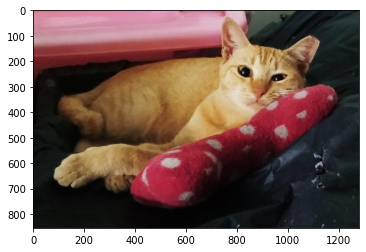

In [21]:
plt.imshow(image_array)
#check how the actual pictures look like

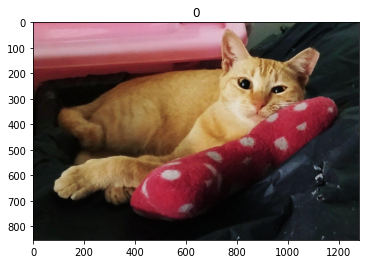

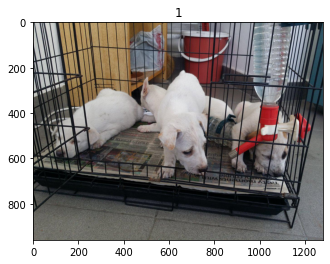

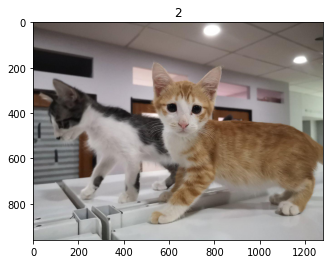

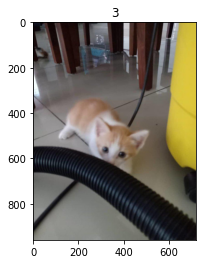

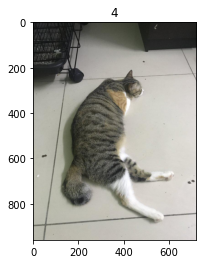

In [22]:
for x in range(5):
    image_path = train_jpg[x]
    image_array = plt.imread(image_path) 
    plt.imshow(image_array)
    plt.title(x) 
    plt.show()

#### To show the pawpularity score of each picture

In [23]:
from pathlib import Path

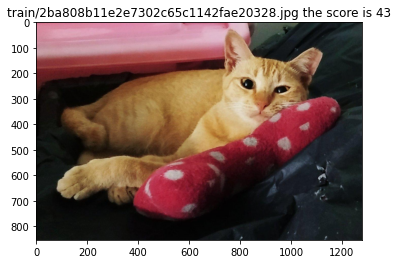

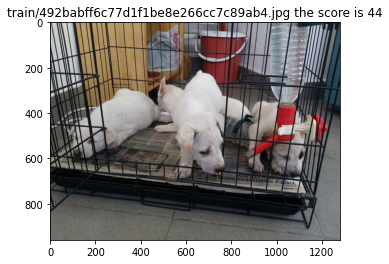

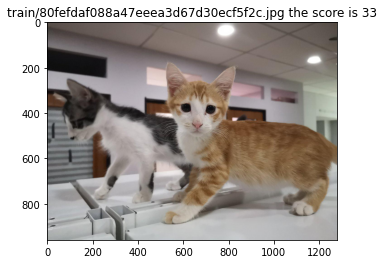

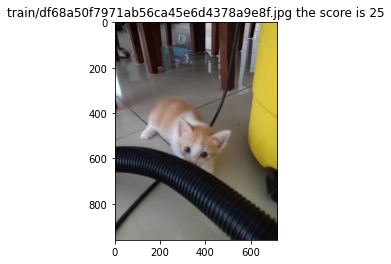

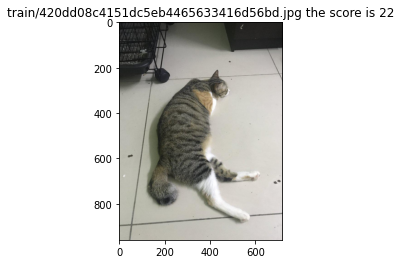

In [24]:
for x in range(5):
    image_path = train_jpg[x]
    
    # to get the matching score
    id_stem = Path(image_path).stem
    id_stem_series = train_df.loc[train_df['Id'] == id_stem,'Pawpularity']
    pawpularity_match_id = id_stem_series.iloc[0]
    
    image_array = plt.imread(image_path) 
    plt.imshow(image_array)
    title = image_path + ' the score is ' +str(pawpularity_match_id)
    plt.title(title) 
    plt.show()

Honestly many similar pictures somehow have very different score. I cannot predict by myself after checking these examples. But there are some trait among the pictures. For example, pictures with high score are usually much clearer.

# Models

In my Machine Learning with R class I learned several models that are suitable for this case.

Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity. For more detail, I suggest reading the book An Introduction to Statistical Learning or simply just check wikipedia Decision_tree_learning.

After the EDA part, I noticed that some features show more importance in the overall score, so I think decision tree would be nice to guide following the features to our final answer. Another reason that I choose decision tree is that in the EDA part, we can see that the data is not really "identicle". Pictures that actually looks alike could have very different score. I'm curious about why. Tree-based methodstypically are not competitive with the best supervised learning approaches but very useful for interpretation. So I think this will still work in this case.

This course also already covered ML and DL, in this project I tried: regression trees, classification trees, Random Forest and Histogram-based Gradient Boosting Regression Tree.

Also this competetion only has five test data so it wouldn't look as good in the graphs. I'll just split train and test data test_size=0.2 myself.

## Regression Trees

In [26]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [27]:
y = train_df['Pawpularity']

# exclude Id and Pawpualarirty for the feature variables
X = train_df.drop(['Id','Pawpularity'],axis=1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [29]:
tree_reg = DecisionTreeRegressor(max_depth = 3, min_samples_split = 10)
tree_reg.fit(x_train, y_train)
tree_reg_pred = tree_reg.predict(x_test)

In [30]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, tree_reg_pred))

20.9694020743959

Not very good result

#### Visualize the tree

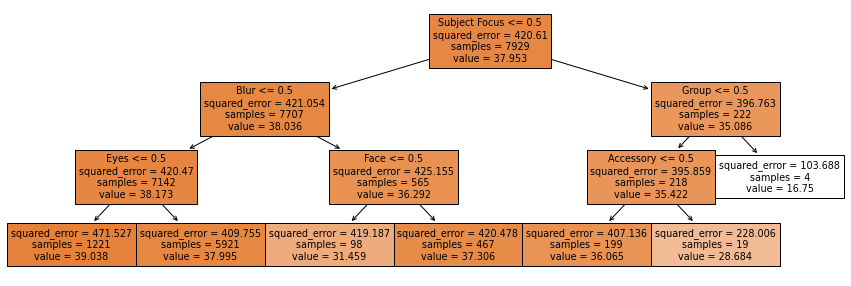

In [31]:
fig = plt.figure(figsize=(15,5))
plot = tree.plot_tree(tree_reg, feature_names=x_train.columns.values.tolist(), filled=True)

#### test the model

In [32]:
import matplotlib.patches as mpatches

In [33]:
def testthemodel(y_test,y_pred,title):
    if max(y_test) >= max(y_pred):
        model_range = int(max(y_test))
    else:
        model_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='green')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.ylabel('Pawpularity ')
    plt.legend(handles = [mpatches.Patch(color='red', label='prediction'),mpatches.Patch(color='g', label='test')])
    plt.show()
    return

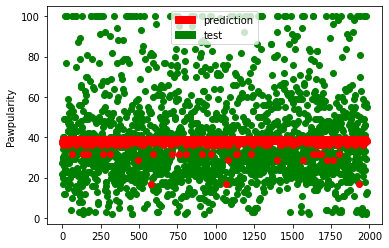

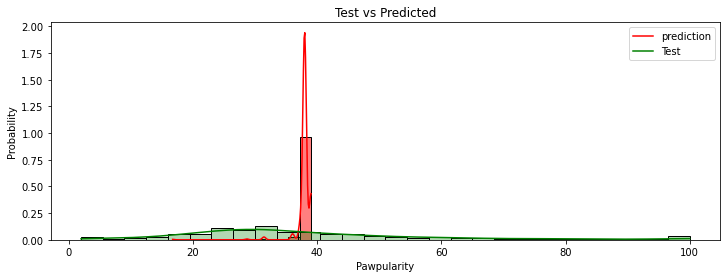

In [34]:
testthemodel(y_test, tree_reg_pred, "Test vs Predicted")
plt.figure(figsize=(12,4))
sns.histplot(tree_reg_pred,color='r',stat='probability', kde=True)
sns.histplot(y_test,color='g',alpha=0.3,stat='probability', kde=True)
plt.legend(labels=['prediction','Test'])
plt.title('Test vs Predicted')
plt.show()

## Classification Trees

Classification tree analysis is when the predicted outcome is the class (discrete) to which the data belongs.

In [35]:
tree_clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 10)
tree_clf.fit(x_train, y_train)
tree_clf_pred = tree_clf.predict(x_test)

In [36]:
np.sqrt(mean_squared_error(y_test, tree_clf_pred))

22.87051626815983

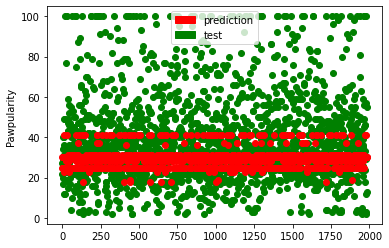

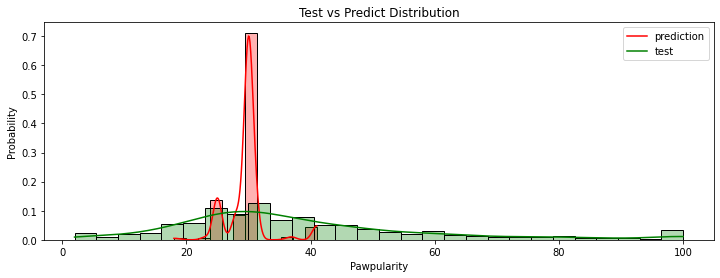

In [37]:
testthemodel(y_test, tree_clf_pred, "Test vs Predicted")

plt.figure(figsize=(12,4))
sns.histplot(tree_clf_pred,color='r',alpha=0.3,stat='probability', kde=True)
sns.histplot(y_test,color='g',alpha=0.3,stat='probability', kde=True)
plt.legend(labels=['prediction','test'])
plt.title('Test vs Predict Distribution')
plt.show()

Actually even if the sqrt is bigger for classification, the graph somehow looks a bit more accurate than regression.

##  Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor(n_estimators=50, max_depth=3)
RF_reg.fit(x_train, y_train)
RF_reg_pred = RF_reg.predict(x_test)

In [45]:
np.sqrt(mean_squared_error(y_test, RF_reg_pred))

20.93836679550922

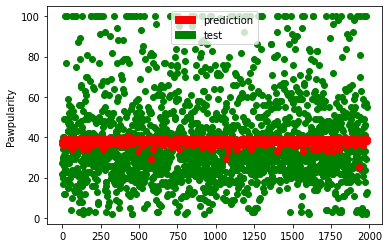

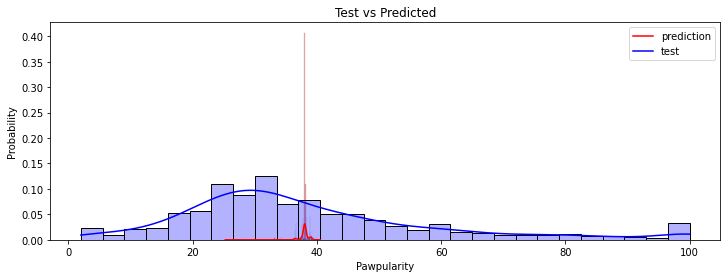

In [47]:
testthemodel(y_test, RF_reg_pred, "Test vs Predicted")

plt.figure(figsize=(12,4))
sns.histplot(RF_reg_pred,color='r',alpha=0.3,stat='probability',kde=True)
sns.histplot(y_test,color='b',alpha=0.3,stat='probability', kde=True)
plt.legend(labels=['prediction','test'])
plt.title('Test vs Predicted')
plt.show()

## Histogram-based Gradient Boosting Regression

This estimator is much faster than GradientBoostingRegressor for big datasets (n_samples >= 10 000).
This estimator has native support for missing values (NaNs). During training, the tree grower learns at each split point whether samples with missing values should go to the left or right child, based on the potential gain. When predicting, samples with missing values are assigned to the left or right child consequently. If no missing values were encountered for a given feature during training, then samples with missing values are mapped to whichever child has the most samples.
This implementation is inspired by LightGBM.

In [49]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

/opt/homebrew/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [52]:
HistGB_reg = HistGradientBoostingRegressor()
HistGB_reg.fit(x_train, y_train)
HistGB_reg_pred = HistGB_reg.predict(x_test)

In [53]:
np.sqrt(mean_squared_error(y_test, HistGB_reg_pred))

20.999718502214154

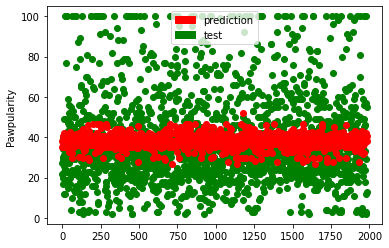

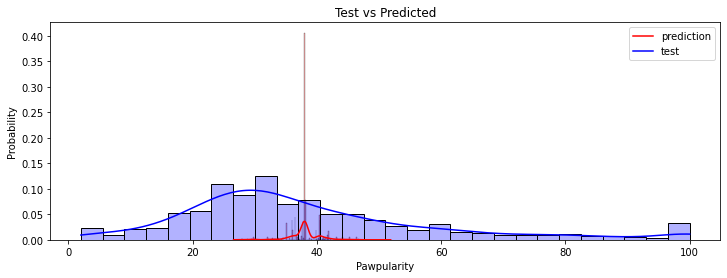

In [54]:
testthemodel(y_test, HistGB_reg_pred, "Test vs Predicted")

plt.figure(figsize=(12,4))
sns.histplot(HistGB_reg_pred,color='r',alpha=0.3,stat='probability',kde=True)
sns.histplot(y_test,color='b',alpha=0.3,stat='probability', kde=True)
plt.legend(labels=['prediction','test'])
plt.title('Test vs Predicted')
plt.show()

# Conclusion

|  model | RMSE  |
| ------------ | ------------ |
|Regression Trees   | 20.97  |
| Classification Trees  | 22.87  |
| Random Forest  | 20.94  |
| Histogram-based Gradient Boosting Regression  |  21.00 |

The tabular based models are ALL BAD. I checked Kaggle for other models, and none of them works. I'll try with the image data in another notebook. I did this one in jupyter notebook but I cannot really use tensorflow so I'll do that in google colab. 